<a href="https://colab.research.google.com/github/black-man-for/Data_analysis/blob/main/Terrorist_Attack_situation_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/terrorist-attacks new.csv')
dataset.head()

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             10517 non-null  object
 1   Code               9263 non-null   object
 2   Year               10517 non-null  int64 
 3   Terrorist attacks  10517 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 328.8+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset['State_t'] = lb.fit_transform(dataset.Entity)

In [4]:
dataset

,Entity,Code,Year,Terrorist attacks,State_t
0,Afghanistan,AFG,1970,0,0
1,Afghanistan,AFG,1971,0,0
2,Afghanistan,AFG,1972,0,0
3,Afghanistan,AFG,1973,1,0
4,Afghanistan,AFG,1974,0,0
...,...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3,220
10513,Zimbabwe,ZWE,2018,2,220
10514,Zimbabwe,ZWE,2019,2,220
10515,Zimbabwe,ZWE,2020,1,220


In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset['country_no'] = lb.fit_transform(dataset.Code)

In [6]:
dataset

,Entity,Code,Year,Terrorist attacks,State_t,country_no
0,Afghanistan,AFG,1970,0,0,0
1,Afghanistan,AFG,1971,0,0,0
2,Afghanistan,AFG,1972,0,0,0
3,Afghanistan,AFG,1973,1,0,0
4,Afghanistan,AFG,1974,0,0,0
...,...,...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3,220,195
10513,Zimbabwe,ZWE,2018,2,220,195
10514,Zimbabwe,ZWE,2019,2,220,195
10515,Zimbabwe,ZWE,2020,1,220,195


In [7]:
dataset.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             10517 non-null  object
 1   Code               9263 non-null   object
 2   Year               10517 non-null  int64 
 3   Terrorist attacks  10517 non-null  int64 
 4   State_t            10517 non-null  int64 
 5   country_no         10517 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 493.1+ KB


In [8]:
dataset.describe()

,Year,Terrorist attacks,State_t,country_no
count,10517.000000,10517.000000,10517.000000,10517.000000
mean,1996.226871,76.825711,109.532852,108.445374
std,15.089465,532.336065,63.789140,62.275947
min,1970.000000,0.000000,0.000000,0.000000
25%,1983.000000,0.000000,54.000000,54.000000
50%,1997.000000,0.000000,110.000000,109.000000
75%,2009.000000,6.000000,164.000000,167.000000
max,2021.000000,16820.000000,220.000000,196.000000


In [9]:
dataset.head(10)

,Entity,Code,Year,Terrorist attacks,State_t,country_no
0,Afghanistan,AFG,1970,0,0,0
1,Afghanistan,AFG,1971,0,0,0
2,Afghanistan,AFG,1972,0,0,0
3,Afghanistan,AFG,1973,1,0,0
4,Afghanistan,AFG,1974,0,0,0
5,Afghanistan,AFG,1975,0,0,0
6,Afghanistan,AFG,1976,0,0,0
7,Afghanistan,AFG,1977,0,0,0
8,Afghanistan,AFG,1978,0,0,0
9,Afghanistan,AFG,1979,3,0,0


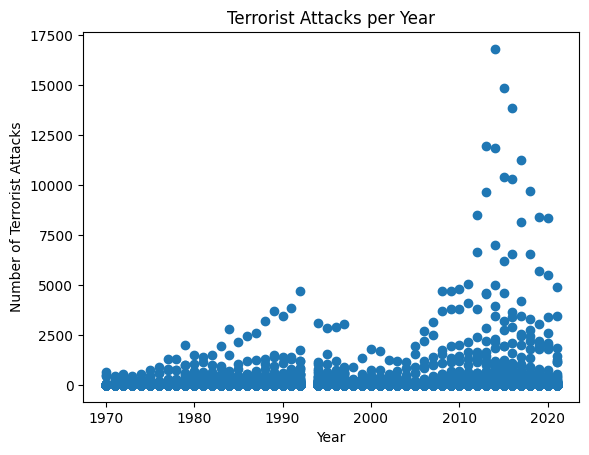

In [10]:
import matplotlib.pyplot as plt

plt.scatter(dataset['Year'], dataset['Terrorist attacks'])
plt.title("Terrorist Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Terrorist Attacks")
plt.show()


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Mounted at /content/drive


In [12]:
data2 = dataset.drop(columns = ['Entity','Code'])

In [15]:
x = data2.drop(columns=['Terrorist attacks'])
y = data2['Terrorist attacks']


In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x,y, random_state=42, test_size= 0.2
)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)


0.03190548614475741

In [18]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)


525.4476976660907


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression(),ExtraTreesRegressor(),Ridge()]

errors = {}

for model in models:
    model.fit(xtrain,ytrain)
    name = type(model).__name__
    score = model.score(xtest,ytest)*100
    errors[name] = score

In [25]:
errors

{'RandomForestRegressor': 94.9599857362102,
 'DecisionTreeRegressor': 91.74205409688466,
 'LinearRegression': 3.190548614475741,
 'ExtraTreesRegressor': 92.83720694816618,
 'Ridge': 3.1905485064743555}

<BarContainer object of 5 artists>

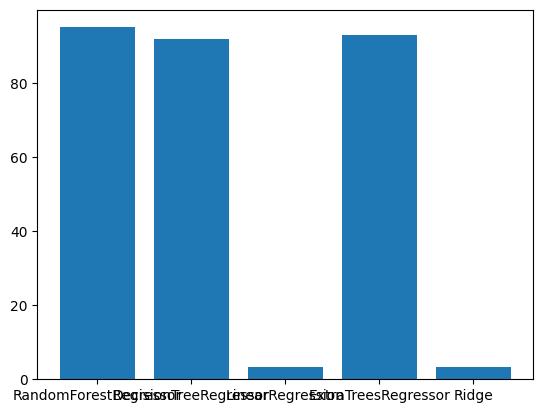

In [26]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())


/tmp/ipython-input-120495182.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


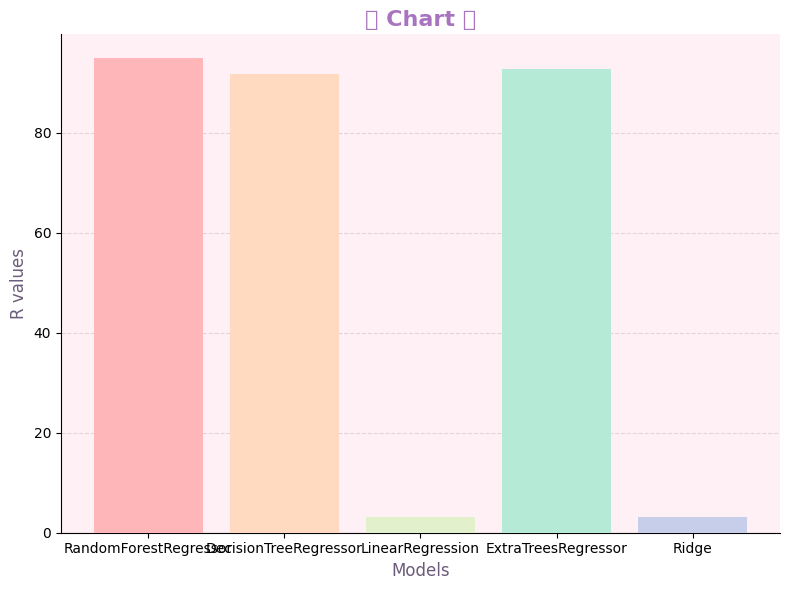

In [28]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
